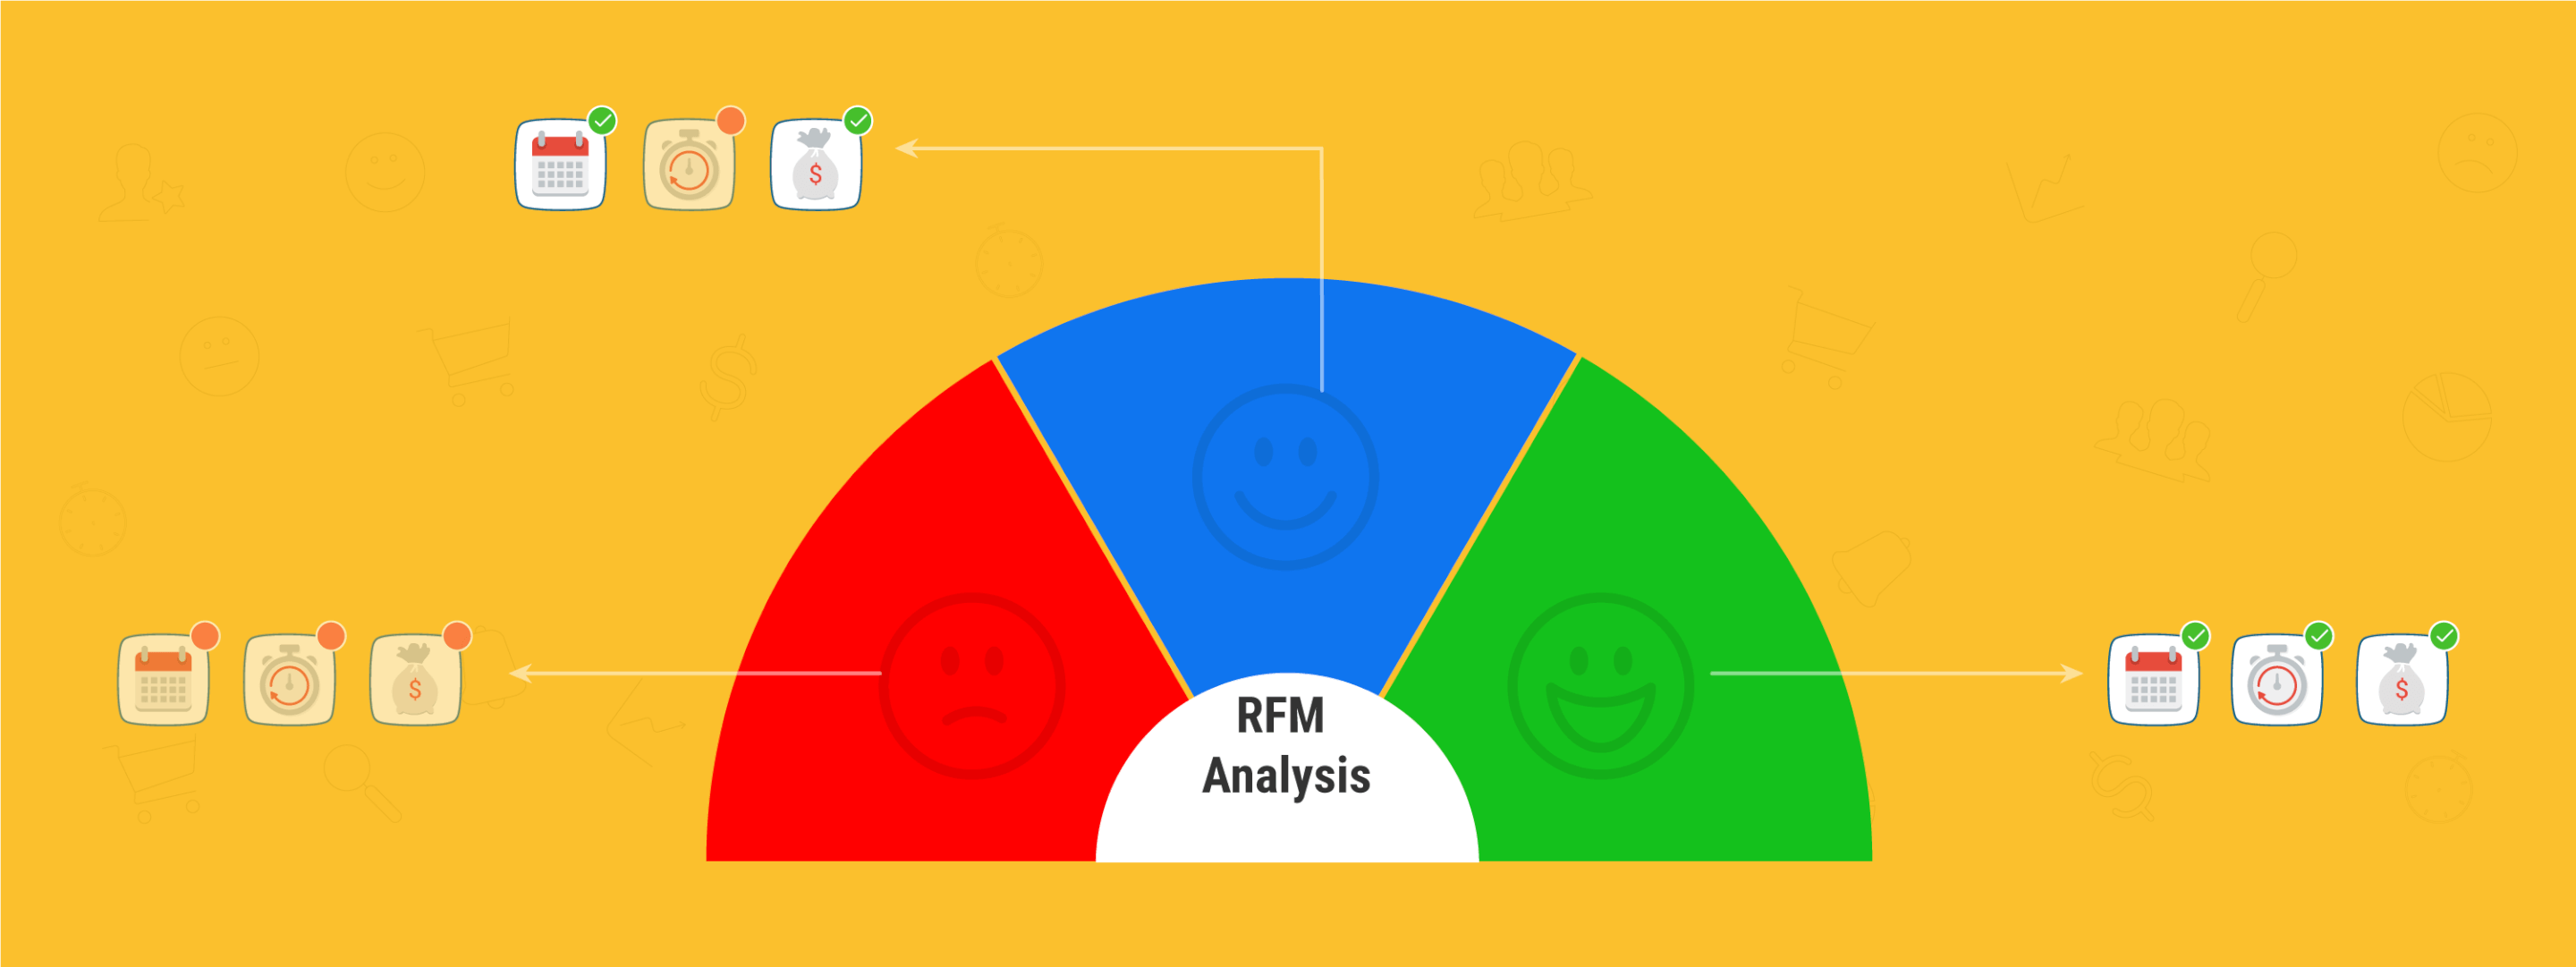

**SATIŞLARIN %80'İ, MÜŞTERİLERİN %20'SİNDEN GELİR.**

RFM analizinde payı olan Pareto Prensibini duydunuz mu ?  
Bu prensibe göre ortaya çıkan etkenlerin %80 'i etkenlerin yalnızca %20'sinden kaynaklanır. 

Markalar yeni müşteriler kazanmak ve müşterilerini elde tutmak için çok ciddi yatırımlar yapıyor.  
Peki var olan müşteriyi elde tutmanın yeni müşteri kazanmaktan daha az maliyetli olmasına ne diyorsunuz ?

**Peki bizim için sadık müşteriyi ya da kaybedemeyeceğimiz o %20' lik dilimde olan müşteriyi nasıl bulacağız ?**  


**RFM ANALİZİ NEDİR VE NEDEN KULLANILIR ?**

RFM, bir müşteri segmentasyon yöntemidir. 

Müşteriler satın alma alışkanlıkları üzerinden gruplara ayrılır ve bu gruplar özelinde stratejiler geliştirilmesi sağlanır. 

Firmalar RFM analizi yaparak hangi müşterilerine markalarını hatırlatılması gerektiğine, hangi müşterilere kendilerini daha özel hissettirmeleri gerektiğine karar verirler.  
Kaybetmek üzere oldukları müşterilerini analiz ederek onlara karşı tedbirler almaları gerektiğini tespit ederler.

**RFM ANALİZİ NASIL YAPILIR ?**

RFM ; Recency, Frequency ve Monetery kelimelerinin baş harflerinden oluşur ve yine bu metrikler ile skorlandırılması yapılır.  

*Recency:* Müşterinin güncelliğidir. En son kaç gün önce işlem yapıldığıyla ifade edilir. Müşteri ne kadar güncelse o kadar değerlidir.  
*Frequency:* Müşterinin işlem sayısını ifade eder. Müşterinin işlem sayısı ne kadar yüksek ise o kadar yüksek puan alır.  
*Monetary:* Müşterinin işlemleri sonucu bıraktığı parasal değeri ifade eder. Markaya daha çok para kazandıran müşteri daha öndedir.

Gelin şimdi RFM analizi ile müşteri segmentasyonunu bir örnek  üzerinden inceleyelim :


# **> Veri Seti Hakkında**

Elimizde bir online ayakkabı mağazasının verileri var ve bizden kampanya yapılması gereken müşterileri analiz etmemiz bekleniyor.


Veri setindeki değişkeleri inceleyelim:
* master_id: Eşsiz müşteri numarası
* order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
* last_order_channel : En son alışverişin yapıldığı kanal (Android, ios, Desktop, Mobile, Offline)
* first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
* last_order_date : Müşterinin yaptığı son alışveriş tarihi
* last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
* last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
* order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
* order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
* customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
* customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
* interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

In [1]:
#Veri setimizi okutalım, df olarak atayalım ve kullanacağımız kütüphaneleri import edelim: 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
import matplotlib.pyplot as plt

df=pd.read_csv('/kaggle/input/rfm-segmentation/data_20k.csv')

#Veri setini biraz analiz edip yorumlayalım:

#df.head() ile ilk 5 gözlem birimimizi ve değişkenlerimizi inceleyelim: 
df.head()

/kaggle/input/rfm-segmentation/data_20k.csv


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [2]:
#Veri setindeki satır ve sütun bilgilerine erişebiliriz:
df.shape           

(19945, 12)

In [3]:
#Veri setindeki sayısal değişkenlerin betimsel istatistiklerine erişebiliriz. 
#Aykırı değerleri gözlemleyebilir, ortalama , max , min gibi bir çok analize ulaşılabilir.
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [4]:
#Veri setinde boş değer olup olmadığını görebilir buna göre aksiyon alabiliriz.
#(Veri seti hikayesine göre boş değerleri silinebilir ya da başka objelerle doldurulabilir)
df.isnull().sum()  

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [5]:
#Veri setindeki değişkenlerin tip incelemesi yapılabilir.
df.dtypes          

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [6]:
#Değişkenlerin tip bilgisi dışında gözlem brimi ve değişken sayısı, boş değer olup olmadığını da gösterir.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

# **Veri Ön Hazırlık**

RFM metriklerinin hazırlanması sürecine geçebiliriz. 

R için son alışveriş yapıla tarihten geçen süre,  
F için toplam yapılan işlem sayısı,  
M için toplam harcanan para 

bilgilerine erişmemiz gerekiyor.  
Bu bilgilere erişmek için veri setindeki değişkenleri hazırlayacağız:

In [7]:
#Veri setini incelediğimizde alışveriş sayısı ve toplam ücret değişkenlerinin online ve offline olarak ayrı değişkenlerde analiz edildiğini görüyoruz.
#Değişkenleri kendi içlerinde toparlayalım:

df['order_num_total'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['customer_value_total'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
df.head()

#artık order_num_total ve customer_value_total değişkenlerimizı veri setinde görebiliriz.  
#toplam yapılan alışveriş (işlem) sayısı ve toplam harcanan para degişkenlerimizi oluşturmuş olduk.

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [8]:
#RFM metrikleri hazırlık sürecinde verisetindeki tarih içeren değişkenlerin, tipini date'e çevirmemiz gerekiyor.
#tarih içeren tüm değişkenlere df.loc[:, df.columns.str.contains('date')] ifadesi ile erişileblir.
#değişkenlerin tümünü date'e çevirelim ve aynı değişkenlere atamasını yapalım:

df.loc[:, df.columns.str.contains('date')] = df.loc[:, df.columns.str.contains('date')].apply(pd.to_datetime)

#( info() ile kontrol ederek dönüşümü kontrol edebiliriz.)
#(Bu kısımda datetime kütüphanesini import ettiğimizden emin olalım.)

In [9]:
#Recency değerimiz için müşterinin en son alışveriş yaptığı tarihten geçen zamanı hesaplamalıyız.
#Verisetindeki girilen son tarihi max() ile bulalım :

df['last_order_date'].max()

Timestamp('2021-05-30 00:00:00')

In [10]:
#ardından 2 gün sonrasını analiz tarihi olarak (today date) atayalım.
today_date = dt.datetime(2021, 6, 1)

# **RFM Metriklerinin Oluşturulması**

Artık RFM metriklerini oluşturmaya başlayabiliriz.

* Recency metriğini oluşturmak için olşturduğumuz today_date deişkeninden veri setindeki son alışveriş yapılan tarihi çıkarmamız gerekecek.
* Frequenc değeri için oluşturduğumuz 'order_num_total' değişkenini kullanacağız.
* Monetary değeri için de oluşturduğumuz 'customer_value_total' değişkenini kullanacağız.

Tüm bu işlemler için ayrı bir 'rfm' dataframe oluşturmak ilerlemeyi kolaylaştıracaktır.

In [11]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date :  (today_date - last_order_date.max()).days,
                                  'order_num_total': lambda order_num_total:  order_num_total,
                                  'customer_value_total': lambda customer_value_total: customer_value_total })
rfm.head()

#ihtiyacımız olan değişkenleri 'master_id' gruplaması altında yeni bir dataframe atadık.

,last_order_date,order_num_total,customer_value_total
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


In [12]:
#Tabloda görülen 'last_order_date', 'order_num_total', 'customer_value_total' değişkenlerini RFM metrikleri ile değiştirelim:

rfm.columns= ['recency', 'frequency', 'monetary']
rfm.head()


,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


RFM metriklerimizi oluşturduk. 
*Peki ama biz bu metrikler arasında nasıl karşılaştırma yapacağız ? *

Recency değeri 10 olan (10 gün önce alışveriş yapan)  müşteri , yine recency değeri 298 (298 gün önce alışveriş yapan) müşteri marka için daha önemlidir. 

Ya da markadan 10 kere alışveriş yapan müşteri 1 kere alışveriş yapana göre markaya daha yakındır.
Metrikleri kendi içerisinde kıyaslayabiliriz. 

Peki sık alışveriş yapan mı, en yeni alışveriş yapan mı ya da daha fazla  para harcayan mı marka için önemlidir ?

**Metrikleri birbirleriyle kıyaslamak halihazırda mümkün değildir.**
**Bu yüzden var olan RFM metriklerini aralarında analizler yapabileceğimiz RFM Skorlarına çevireceğiz.**

# **RFM Skorlarının Oluşturulması**

RFM Metriklerini değerlendirilebilir brimlere çevirebilmek için aynı aralıklarda ifade etmemiz gerekecek.  
qcut fonksiyonu yardımıyla metrikleri 1 ve 5 arasında puanlandıracağız.

**NOT:** Recency_score oluşturulurken en yeni olan marka için daha güncel müşteri olacak ve daha yüksek puanlandırılması için skorlar [5, 4, 3, 2, 1] olarak girilecek. 

**NOT:** rank methodu aynı aralğa yığılma olduğunda sistemin atamayı nasıl yapacağını bilmemesi durumunu çözmek için kullaılır. First argümanı ile ilk görülenden başlanarak atama yapılır.


In [13]:
rfm['recency_score']= pd.qcut(rfm['recency'], 5 , [5, 4, 3, 2, 1])
rfm['frequency_score']= pd.qcut(rfm['frequency'].rank(method='first'), 5 , [1, 2, 3, 4, 5])
rfm['monetary_score']= pd.qcut(rfm['monetary'], 5 , [1, 2, 3, 4, 5])
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5


'recency_score',  'frequency_score' ve 'monetary_score' değeşkenlerini oluşturduk.  
Artık tüm değişkenleri aynı skorlar ile ifade edebiliyoruz.  
Oluşturduğumuz bu skorları segmentlere ayırabilmek için string cinsinden yanyana ifade etmemiz gerekecek.

**NOT:**  Segmentler oluşturulurken e-ticaret sektörüyle ilgili olarak Monetary değeri hesaba katılmamaktadır. Müşterinin parasal getirisi bu veri seti için ön planda değildir.(Sektöre bağlı olarak)  
Öncelik Recency ve Frequency değeri yüksek sadık müşteriler kazanmaktır.
Sadık müşteriler kazandıktan sonra monetary değeri artış gösterecektir.


In [14]:
rfm['RF_SCORE']= rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54


# **RFM Segmenlerinin Oluşturulması**

RF_SCORE değişkeni de oluşturularak veri setine eklendi.  
Artık analiz için müşterileri segmentlere ayırmamız gerekiyor.  

**NOT:**      r'[1-2][3-4]'       ifadesi okunan skorun ilk basamağında [1-2] (1 ya da 2), ikinci basamağında [3-4] (3 ya da 4) görüldüğünde 'regex=True' argümanı okunan sayıların karşılığındaki string ifadeyi yerleştirir. 


In [15]:
seg  = { r'[1-2][1-2]' : 'hibernating',
         r'[1-2][3-4]' : 'at_risk',
         r'[1-2]5' : 'cant_loose',
         r'3[1-2]' : 'about_to_sleep',
         r'33' : 'need_attention',
         r'[3-4][4-5]' : 'loyal_customers',
         r'41' : 'promising',
         r'51' : 'new_customers',
         r'[4-5][2-3]' : 'potantial_loyalist',
         r'5[4-5]' : 'champions' }

rfm['RF_SEGMENTS'] = rfm['RF_SCORE'].replace( seg, regex=True )
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RF_SEGMENTS
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23,at_risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54,champions


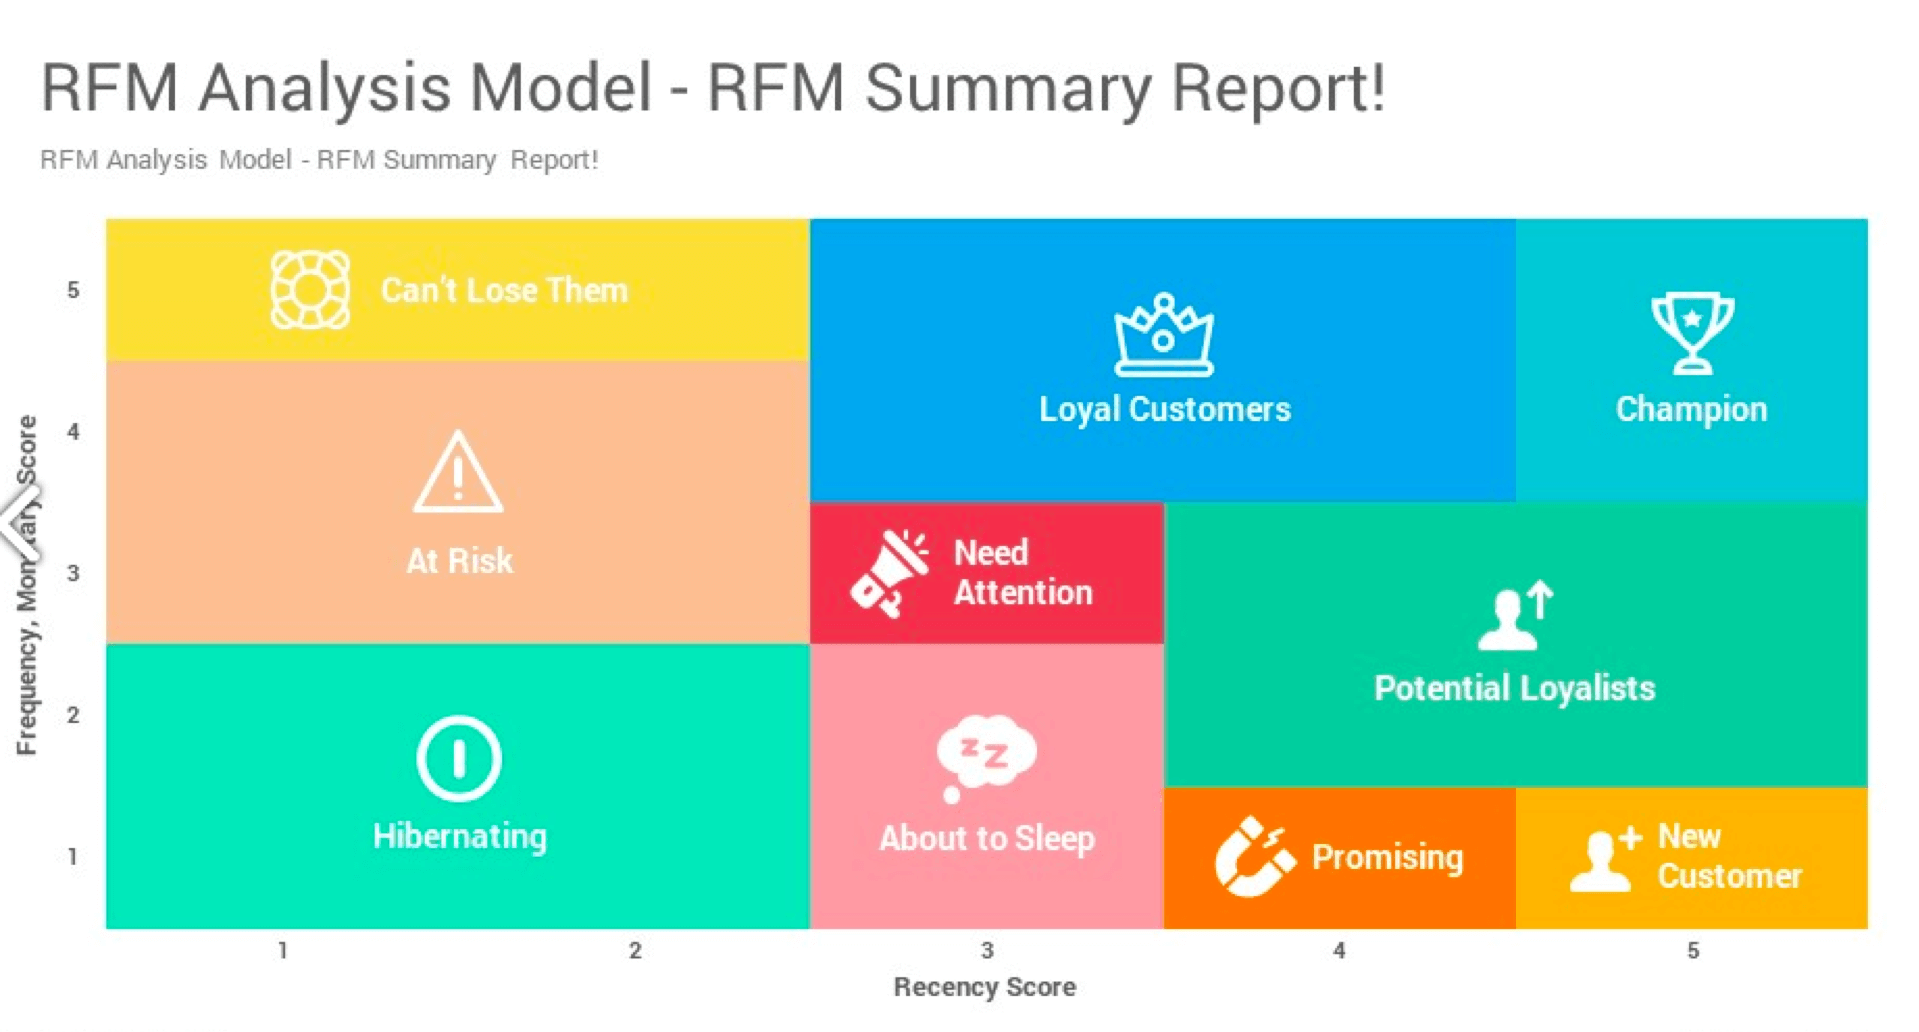

**RFM Segmentleri üzerine biraz tartışalım:**

Recency ve Frequency skorları arasındaki ilişkiye göre müşterilerin segmentlere ayırdık.
* Recency skoru yüksek olan ( yakın tarihte son alışerişini yapan ) ve Frequency skoru düşük olan ( Az sayıda işlem yapan ) müşterinin değer aralığı olarak New Customer segmentinde olması beklenir(Hem yakın tarihte hem az sayıda alışveriş yapan müşteri yeni müşteridir.)
* Recency skoru yüksek olan ( yakın tarihte son alışerişini yapan ) ve Frequency değeri de yüksek olan ( çok sayıda işlem yapan ) müşterinin değer aralığı olarak Champion segmentinde olması beklenir(Hem yakın tarihte hem çok sayıda alışveriş yapan güncel müşteri en iyi müşterilerdendir.)

Bu şekilde tüm segmentleri yorumamamız mümkün.


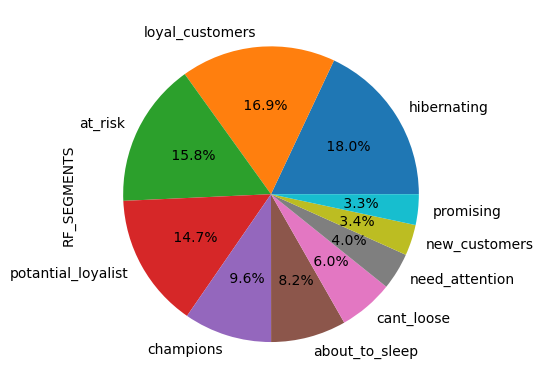

In [16]:
#Segmentleri içerisindeki müşteri sayılarına göre görselleştirelim: 

rfm['RF_SEGMENTS'].value_counts().plot(kind='pie', autopct=' %1.1f%%')
plt.show(block=True)

**Metrikler, skorlar ve segmenlere çevirildi. Peki süreç nasıl devam edecek ?**

Segmentleri müşteri sayılarına ve ortalamalarına göre analiz ederek yorumlayalım :




In [17]:
rfm[["RF_SEGMENTS", "recency", "frequency", "monetary"]].groupby("RF_SEGMENTS").agg(["mean", "count"])

recency        frequency           monetary      
                          mean count       mean count         mean count
RF_SEGMENTS                                                             
about_to_sleep      114.031649  1643   2.406573  1643   361.649373  1643
at_risk             242.328997  3152   4.470178  3152   648.325038  3152
cant_loose          235.159129  1194  10.716918  1194  1481.652446  1194
champions            17.142187  1920   8.965104  1920  1410.708938  1920
hibernating         247.426303  3589   2.391474  3589   362.583299  3589
loyal_customers      82.557926  3375   8.356444  3375  1216.257224  3375
need_attention      113.037221   806   3.739454   806   553.436638   806
new_customers        17.976226   673   2.000000   673   344.049495   673
potantial_loyalist   36.869744  2925   3.310769  2925   533.741344  2925
promising            58.694611   668   2.000000   668   334.153338   668

Yukarıdaki çıktıyı analiz ettiğimizde hangi müşterileri ödüllendireceğimizi, hangilerini kaybetmek istemediğimizi ya da hangi müşterilerle daha fazla ilglenmemiz gerektiğini görebiliriz.
Örneğin:
* At Risk grubunu inceleyelim: Bu müşteriler alışverişinin üstünden çok uzun zaman geçen yeni müşterilerimiz. (Recency değeri yüksek, Frequency değeri düşük)
Bu müşterilere özel kampanya düzeleyerek markaya tekrar dönmeleri sağlanabilir. Aynı zamanda count sütununda görülüyor ki sayıları oldukça fazla yani gerçekten uğraşmamız gereken müşteri gruplarından.
* Cant Loose grubu Frequency değeri yüksek olması sebebiyle uzun zamandır işlem yapmayan geri kazanmamız gereken müşteriler. Aynı zamanda Monetary değeri de oldukça yüksek.
* Loyal Customers , Champıons markanın sadık müşteri takımı. Recency değerleri düşük(yakın zamanda işlem yapan) ve Freuency değerleri yüksek(Fazla sayıda işlem yapan). Bu yüzden sadakatlerini ödüllendirmek için en iyi müşterilere yönelik özel kuponlar tanımlanabilir.
* Hibernating grubu yüksek Recency ve düşük Frequency değeriyle dikkatimizi çekiyor. Bunun nedeni uzun zaman önce işlem yapmış olmaları. Hem yaptığımız görselleştirmeden hem de yukarıdaki analizden sayılarının fazlalığına bakarsak bu müşterilere yönelik hareket etmezsek kaybetemiz kaçınılmaz olacaktır.  

Bu şekilde markanın ihtiyaçlarına ve politikalarına yönelik bir çok analiz yapmamız mümkün.

# **Uygulama**

Marka bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde.Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçilmek isteniliyor.Bu müşterilerin **sadık  ve  kadın kategorisinden alışveriş yapan kişiler** olması planlandı.  
Bizden Müşterilerin id numaralarını csv dosyasına 'yeni_marka_hedef_müşteri_id.cvs' olarak kaydetemiz bekleniyor. 

* *Öncelikle bizden bekleneni anlayalım:*

 *Sadık müşteri kategorimiz rfm dataframe altında 'RF_SEGMENTS' değişkeninde bulunan 'champions' ve 'loyal_customers' grupları.*

 *Kadın kategorisinden alışveriş yapanlar ise df dataframe altında bulunan 'interested_in_categories_12' değişkeni içinde bulunuyor.
İki farklı dataframeden alacağımız ortak 'müşteri_id' için bu iki dataframei merge ile birleştirmemiz gerkiyor.*


In [18]:
pd.merge( rfm[rfm['RF_SEGMENTS'].isin(['champions', 'loyal_customers'])] ,  
         df[ df['interested_in_categories_12'].str.contains('KADIN')], 
         on='master_id')[['master_id']].to_csv('yeni_marka_hedef_müşteri_id.cvs', index=False)

Merge ettiğimiz iki dataframe den ortak olanların 'master_id' seçimlerini yaptık ve bu bilgileri csv dosyasına aktarmış olduk. Bu csv dosyasını Project klasörü altında gözlemleyebiliriz.  

Görülüğü gibi RFM Analizi ile Müşteri Segmentasyonu bir çok sektör için çok değerli. 
Segmentleri hazıladıktan sonra tüm ihtiyaçlara yönelik olarak müşterilere kolayca erişilebilir.  
Belli sürelerle bu analizlerin güncellenmesi gerektiğini de belirtmiş olayım.



> **Umarım sizler için açıklayıcı bir anlatım olmuştur.  
> Beğendiyseniz UPVOTE yapmayı unutmayın.**  
> 
> 
> **Linkedin hesabımdan takip edebilir, konuyla ilgili tüm soruları sorabilirsiniz.**  
> 
> https://www.linkedin.com/in/merve-yavuz/
> 
> **Takipte kalın :)**  
> 
> https://medium.com/@arcyalcin  
> https://www.kaggle.com/bimervos  
> https://github.com/bimervos